# Introduction


This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [317]:
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

### Notebook Presentation

In [318]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [319]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

In [320]:
print(df_data.shape)
print(df_data.columns)


(4324, 9)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [321]:
df_data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates
 

In [355]:
cleaned_data = df_data.dropna().reset_index()
cleaned_data.isna().values.any()
print(cleaned_data.isnull().values.any())
print(cleaned_data.duplicated().values.any())
cleaned_data = cleaned_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
print(cleaned_data.shape)

False
False
(964, 8)


In [323]:
cleaned_data.tail(5)

,index,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
959,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
960,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
961,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
962,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success
963,4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63.23,Failure


## Descriptive Statistics

In [324]:
print(cleaned_data.dtypes)
cleaned_data.describe()

index              int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object


,index
count,964.00
mean,858.49
std,784.21
min,0.00
25%,324.75
50%,660.50
75%,"1,112.00"
max,"4,020.00"


In [325]:
cleaned_data["Price"] = pd.to_numeric(cleaned_data["Price"].str.replace(",","",regex=False))
cleaned_data['Price'] = cleaned_data['Price'].round(2)

# Number of Launches per Company

In [326]:
launches_per_company = cleaned_data.groupby("Organisation").count().sort_values(by="index",ascending=False).reset_index()
launches_per_company.head(2)

,Organisation,index,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,CASC,158,158,158,158,158,158,158
1,NASA,149,149,149,149,149,149,149


In [327]:
fig = px.bar(x= launches_per_company["Organisation"], y= launches_per_company["index"], title="Number of Launches per Company")
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_xaxes(title_text="Organisations",tickangle=65)
fig.update_yaxes(title_text="number of launches")
fig.update_layout(
    height=600, 
    width=900,
    template="plotly_white"
)

fig.show()

# Number of Active versus Retired Rockets

In [328]:
active_vs_retired = cleaned_data.groupby("Rocket_Status").agg({"index":"count"})
active_vs_retired = active_vs_retired.rename(columns={"index":"Count"}).reset_index()
active_vs_retired

,Rocket_Status,Count
0,StatusActive,586
1,StatusRetired,378


# Distribution of Mission Status

In [329]:
mission_status = cleaned_data.groupby("Mission_Status").agg({"index":"count"})
mission_status = mission_status.rename(columns={"index":"Count"}).reset_index()
mission_status

,Mission_Status,Count
0,Failure,36
1,Partial Failure,17
2,Prelaunch Failure,1
3,Success,910


# How Expensive are the Launches? 

In [330]:

launch_cost = cleaned_data.groupby("Mission_Status").agg({"index":"count",
                                                            "Price":"sum"})
launch_cost = launch_cost.rename(columns={"index":"Count"}).reset_index()

In [331]:
fig = px.histogram(
    cleaned_data[cleaned_data['Price'] < 1000],  
    x="Price",
    nbins=50,
    title="Distribution of Rocket Launch Prices (USD Millions)"
)
fig.update_layout(bargap=0.1, template="plotly_white")
fig.show()

# Choropleth Map to Show the Number of Launches by Country

In [332]:
cleaned_data["Country"] = cleaned_data["Location"].str.extract(r',\s*([^,]+)$')


cleaned_data["Country"] = cleaned_data["Country"].str.strip()
cleaned_data["Country_code"] = cleaned_data["Country"]


name_change_dict = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Shahrud Missile Test Site": "Iran",
    "Yellow Sea": "China",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA"
}

for name, new_name in name_change_dict.items():
    cleaned_data["Country"] = cleaned_data["Country"].str.replace(name, new_name, regex=True)

cleaned_data["Country"] = cleaned_data["Country"].str.strip()
cleaned_data["Country_code"] = cleaned_data["Country"]


country_code_dict = {
    'China': 'CHN',
    'France': 'FRA',
    'India': 'IND',
    'Japan': 'JPN',
    'Kazakhstan': 'KAZ',
    'New Zealand': 'NZL',
    'Russian Federation': 'RUS',
    'USA': 'USA'
}

for name, code in country_code_dict.items():
    cleaned_data["Country_code"] = cleaned_data["Country_code"].str.replace(name, code, regex=True)
number_of_launches_by_country = cleaned_data.groupby('Country_code').agg({"index":"count"}).reset_index()

In [333]:
fig = px.choropleth(number_of_launches_by_country, locations='Country_code', color='index',
                           color_continuous_scale="Viridis",
                           range_color=(0, 500),
                           labels={'index':'Number of lunches'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Choropleth Map to Show the Number of Failures by Country


In [334]:
failures_by_country = cleaned_data.loc[cleaned_data['Mission_Status'] == 'Failure'].groupby('Country_code').agg({'index':'count'}).reset_index()
fig = px.choropleth(failures_by_country, locations='Country_code',color='index',
                   color_continuous_scale="Reds", range_color=(0,20))
fig.show()

# Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [335]:
fig = px.sunburst(cleaned_data, path=['Country', 'Organisation', 'Mission_Status'], values='Price')
fig.show()

# Total Amount of Money Spent by Organisation on Space Missions

In [336]:
money_spent_by_org = cleaned_data.groupby('Organisation').agg({'Price':['sum','mean']}).reset_index()
money_spent_by_org.columns = ['Organisation', 'Total_Spent', 'Average_Spent']

fig = px.bar(x=money_spent_by_org['Organisation'], y=money_spent_by_org['Total_Spent'], title='Money Spent by Organisation on Space Missions')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_xaxes(title_text="Organisations",tickangle=90)
fig.update_yaxes(title_text="Money Spent in Million $")
fig.update_layout(
    height=600, 
    width=1100,
    template="plotly_white"
)

fig.show()

# Amount of Money Spent by Organisation per Launch

In [337]:
fig = px.bar(x=money_spent_by_org['Organisation'], y=money_spent_by_org['Average_Spent'], title='Money Spent by Organisation Per Launch')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_xaxes(title_text="Organisations",tickangle=90)
fig.update_yaxes(title_text="Money Spent in Million $")
fig.update_layout(
    height=600, 
    width=1100,
    template="plotly_white"
)

fig.show()

# Chart the Number of Launches per Year

In [338]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%a %b %d, %Y %H:%M %Z', errors='coerce')
cleaned_data = cleaned_data.dropna(subset=['Date'])
cleaned_data['Year'] = cleaned_data['Date'].dt.year
cleaned_data['Month'] = cleaned_data['Date'].dt.month_name()
launches_per_year = cleaned_data.groupby('Year').size().reset_index(name='Launch_Count')


In [339]:
fig = px.bar(x=launches_per_year['Year'], y=launches_per_year['Launch_Count'], title='Number of Launches per Year')
fig.update_traces(texttemplate='%{y}',textposition='outside')
fig.update_xaxes(title_text='Years')
fig.update_yaxes(title_text='Launch Count')
fig.update_layout(
    height=600,
    width=1100,
    template='plotly_white'
)
fig.show()

# Number of Launches Month-on-Month until the Present

In [340]:
launches_per_month = cleaned_data.groupby('Month').size().reset_index(name='Launch_Count')
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]


launches_per_month['Month'] = pd.Categorical(
    launches_per_month['Month'],
    categories=month_order,
    ordered=True
)
launches_per_month = launches_per_month.sort_values('Month')


In [341]:
fig = px.bar(x=launches_per_month['Month'], y=launches_per_month['Launch_Count'], title='Number of Launches per Month')
fig.update_traces(texttemplate='%{y}',textposition='outside')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Launch Count')
fig.update_layout(
    height=600,
    width=900,
    template='plotly_white'
)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

In [342]:
print(launches_per_month[launches_per_month['Launch_Count']==launches_per_month['Launch_Count'].max()])
print(launches_per_month[launches_per_month['Launch_Count']==launches_per_month['Launch_Count'].min()])

      Month  Launch_Count
2  December            91
      Month  Launch_Count
3  February            60


# How has the Launch Price varied Over Time? 

In [343]:
avg_price_ov_time= cleaned_data.groupby('Year').agg({'Price':'mean'}).reset_index()
fig = px.line(avg_price_ov_time,x='Year',y='Price')
fig.update_layout(
    height=600,
    width=1100,
    template='plotly_white',
    xaxis=dict(
        tickmode='array',
        tickvals=avg_price_ov_time['Year'],
        tickangle=90)
)

fig.show()

# Plotly Pie Chart comparing the total number of launches of the USSR and the USA


In [344]:
# total number of launches of the USSR and the USA
launches_us_vs_rassia = cleaned_data[cleaned_data['Country'].isin(['USA','Russian Federation'])]
launches_us_vs_rassia_grouped = launches_us_vs_rassia.groupby('Country').agg({'index':'count'}).reset_index()
launches_us_vs_rassia_grouped

,Country,index
0,Russian Federation,54
1,USA,488


In [345]:
fig = px.pie(launches_us_vs_rassia_grouped, values='index', names='Country', title='USA VS Russian Federation launches')
fig.show()

# Total Number of Launches Year-On-Year by the Two Superpowers

In [346]:
launches_us_vs_rassia_YoY = launches_us_vs_rassia.groupby(['Year', 'Country']).size().reset_index(name='Launch_Count')

In [347]:
fig = px.bar(launches_us_vs_rassia_YoY, x='Year', y='Launch_Count',
             hover_data=['Country'], color='Country',
             labels={'pop':'population of Oceania'}, height=400)
fig.update_layout(
    height=500,
    width=1100,
    template='plotly_white'
)
fig.show()

# Total Number of Mission Failures Year on Year.

In [348]:
failures_yoy = cleaned_data.loc[cleaned_data['Mission_Status'] == 'Failure'].groupby('Year').size().reset_index(name="failures_count")


In [349]:
fig = px.bar(failures_yoy, x='Year', y='failures_count',
            )
fig.update_traces(texttemplate='%{y}',textposition='outside')
fig.update_layout(
    height=500,
    width=1100,
    template='plotly_white'
)
fig.show()

# Percentage of Failures over Time


In [350]:
failures_yoy['failure_per'] =  (failures_yoy['failures_count']/sum(launches_per_year['Launch_Count']) * 100)

In [351]:
fig = px.bar(failures_yoy, x='Year', y='failure_per',
            )
fig.update_traces(texttemplate='%{y:.2f}',textposition='outside')
fig.update_layout(
    height=500,
    width=1100,
    template='plotly_white'
)
fig.update_yaxes(title_text='Failure Percentage')
fig.show()

# Lead Country in terms of Total Number of Launches

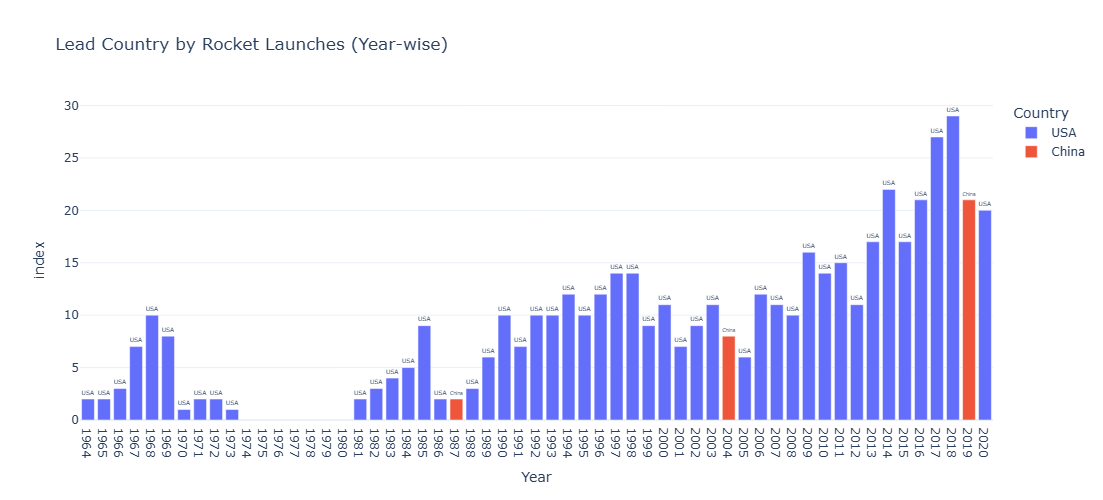

In [352]:
lead_country = cleaned_data.groupby(['Year','Country']).agg({'index':'count'}).reset_index()

lead_country = (
    lead_country.loc[lead_country.groupby('Year')['index'].idxmax()]
    .reset_index(drop=True)
)

fig = px.bar(
    lead_country,
    x='Year',
    y='index',            
    color='Country',      
    text='Country',         
    title='Lead Country by Rocket Launches (Year-wise)',
    height=500,
    width=1100
)

fig.update_traces(textposition='outside')
fig.update_layout(template='plotly_white', xaxis=dict(dtick=1))
fig.show()

# Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

In [353]:
lead_org = cleaned_data.groupby(['Year','Organisation']).agg({'index':'count'}).reset_index()

lead_org = (
    lead_org.loc[lead_org.groupby('Year')['index'].idxmax()]
    .reset_index(drop=True)
)


In [354]:
fig = px.bar(
    lead_org,
    x='Year',
    y='index',            
    color='Organisation',      
    text='Organisation',         
    title='Lead Organisation by Rocket Launches (Year-wise)',
    height=500,
    width=1100
)

fig.update_traces(textposition='outside')
fig.update_layout(template='plotly_white', xaxis=dict(dtick=1))
fig.show()